<a href="https://colab.research.google.com/github/quarcs-lab/pysal-tutorials/blob/master/esda_moran_matrix_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualising the `esda` Moran Matrix with `splot`

`esda.moran.Moran_BV_matrix` offers you a tool to assess the relationship between multiple input variables and over space as bivariate and univariate Moran's I Statistics. `Moran_BV_matrix` returns a dictionary of `Moran_BV` objects which can be displayed and further analysed. In case you are not familiar with Moran Statistics, have a look at `splot`'s `esda_morans_viz.ipynb` notebook. 

## Contents

* What to import?
* Example 1: Working with arrays 
* Example 2: Working with a [geopandas.GeoDataFrame](http://geopandas.org/reference/geopandas.GeoDataFrame.html)

## Install libraries

In [1]:
!pip install -q geopandas
!pip install -q libpysal
!pip install -q mapclassify
!pip install -q splot
!pip install -q legendgram
!pip install -q esda
!pip install -q inequality
!pip install -q giddy
!pip install -q ipywidgets 

     |████████████████████████████████| 931kB 3.5MB/s 
     |████████████████████████████████| 10.4MB 53.8MB/s 
     |████████████████████████████████| 14.7MB 30.8MB/s 
     |████████████████████████████████| 2.4MB 3.3MB/s 
     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
     |████████████████████████████████| 266kB 7.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 235kB 10.7MB/s 


## Load libraries

In [0]:
from libpysal.weights.contiguity import Queen
from libpysal import examples
import libpysal as lp
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

## Example 1: Working with arrays

There are generally two ways in which a `Moran_BV_matrix` and a `splot.esda.moran_facet` can be generated. The first of the two options is to use `np.arrays` representing the attributes of different variables and adding a list of variable names. This first option is a great choice in case you needed to calculate your weights separately with `libpysal.weights` and already have your values stored in an array. The second and more popular option is ot directly load a DataFrame. If you are unsure in how to work with `numpy` arrays or you already have your variables stored in a dataframe, we would recommend to use Example 2.

In this example we will look at visualizing your results stored as a `np.array`. We know that we would like to examine all values for the variables named: `varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']`. We can pass in a list of these variable names separately with `varnames=varnames`. Additionally, we need to create an `np.array` containing the values of each individual variable separately with `vars = [np.array(f.by_col[var]) for var in varnames]`:

In [3]:
f = gpd.read_file(examples.get_path("sids2.dbf"))

varnames = ['SIDR74',  'SIDR79',  'NWR74',  'NWR79']
varnames

['SIDR74', 'SIDR79', 'NWR74', 'NWR79']

In [4]:
variable = [np.array(f[variable]) for variable in varnames]
variable[0]

array([0.91659 , 0.      , 1.568381, 1.968504, 6.333568, 4.820937,
       0.      , 0.      , 4.132231, 0.620347, 1.932367, 3.596314,
       2.393776, 2.570694, 1.834862, 4.988914, 1.831502, 1.271456,
       0.755858, 2.066116, 1.331558, 0.      , 0.788022, 1.429593,
       0.843313, 1.421157, 2.782534, 4.531722, 1.264223, 2.007528,
       1.989555, 0.      , 2.734482, 1.66251 , 0.      , 1.291156,
       1.104667, 2.614379, 0.966417, 0.8285  , 0.      , 1.452169,
       1.399384, 5.050505, 0.      , 2.569373, 1.570916, 1.215067,
       2.971367, 0.651324, 2.748331, 0.868961, 1.197605, 1.500375,
       0.947867, 0.      , 2.600297, 4.444444, 4.597701, 2.220249,
       4.010695, 2.71166 , 1.588983, 2.055076, 3.610108, 1.749781,
       1.888218, 2.038169, 0.731886, 2.384738, 2.122241, 1.942502,
       0.      , 2.786291, 2.557545, 1.220324, 1.876173, 0.      ,
       1.322314, 1.845018, 1.94742 , 1.865855, 1.730104, 1.021711,
       9.55414 , 4.685408, 0.      , 1.610954, 1.451379, 0.   

Next, we can open a file containing pre calculated spatial weights for "sids2.dbf". In case you don't have spatial weights, check out `libpysal.weights` which will provide you with many options calculating your own.

In [5]:
w = lp.io.open(examples.get_path("sids2.gal")).read()
w

Now we are ready to import and generate our `Moran_BV_matrix`:

In [6]:
from esda.moran import Moran_BV_matrix

matrix = Moran_BV_matrix(variable, w, varnames = varnames)
matrix

{(0, 1): <esda.moran.Moran_BV at 0x7f3287641358>,
 (0, 2): <esda.moran.Moran_BV at 0x7f329f20ae80>,
 (0, 3): <esda.moran.Moran_BV at 0x7f328764e1d0>,
 (1, 0): <esda.moran.Moran_BV at 0x7f328764e198>,
 (1, 2): <esda.moran.Moran_BV at 0x7f328764e5f8>,
 (1, 3): <esda.moran.Moran_BV at 0x7f328764e588>,
 (2, 0): <esda.moran.Moran_BV at 0x7f328764e208>,
 (2, 1): <esda.moran.Moran_BV at 0x7f328764ecc0>,
 (2, 3): <esda.moran.Moran_BV at 0x7f32860bc668>,
 (3, 0): <esda.moran.Moran_BV at 0x7f328765c128>,
 (3, 1): <esda.moran.Moran_BV at 0x7f328764e5c0>,
 (3, 2): <esda.moran.Moran_BV at 0x7f32860bc6a0>}

Let's visualise our matrix with `splot.esda.moran_facet()`. You will see Univariate Moran objects with a grey background, surrounded by all possible bivariate combinations of your input dataset:

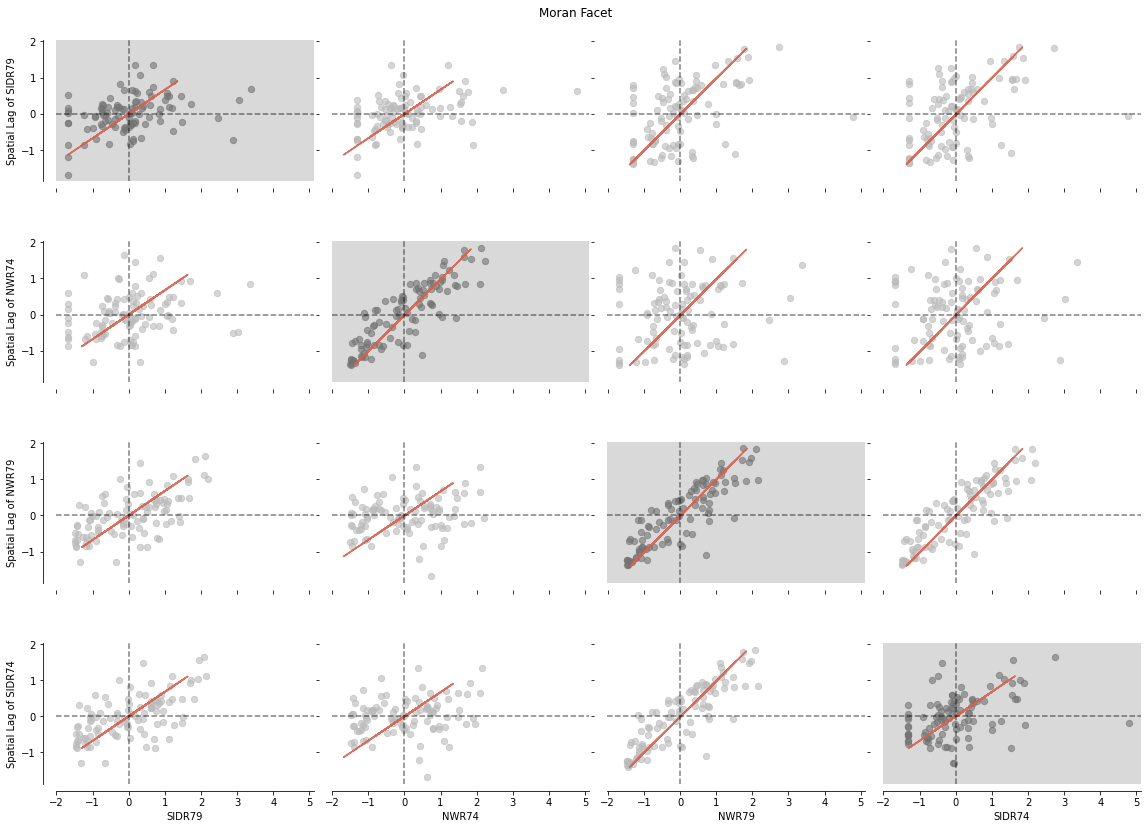

In [7]:
from splot.esda import moran_facet

moran_facet(matrix)
plt.show()

## Example 2: insert a DataFrame

Additionally, it is possible to generte your `Moran_BV_matrix` and a `moran_facet` using a `pandas` or `geopandas` DataFrame as input. Let's have a look at a simple example examining `columbus.shp` example data:

In [0]:
path = examples.get_path('columbus.shp')
gdf = gpd.read_file(path)

In order for `moran_facet` to generate sensible results, it is recommended to extract all columns you would specifically like to analyse and generate a new GeoDataFrame:

In [9]:
variables2 = gdf[['HOVAL', 'CRIME', 'INC', 'EW']]
variables2.head()

,HOVAL,CRIME,INC,EW
0,80.467003,15.725980,19.531,1.0
1,44.567001,18.801754,21.232,0.0
2,26.350000,30.626781,15.956,1.0
3,33.200001,32.387760,4.477,0.0
4,23.225000,50.731510,11.252,1.0


In [10]:
variables2.shape

(49, 4)

We will now generate our own spatial weights leveraging `libpysal` and create a second `matrix2` from our GeoDataFrame. Note that there is no list of `varnames` needed, this list will be automatically extracted from teh first row of your `gdf`:

In [11]:
w2 = Queen.from_shapefile(path)
w2

In [12]:
from esda.moran import Moran_BV_matrix

matrix2 = Moran_BV_matrix(variables2, w2)
matrix2

{(0, 1): <esda.moran.Moran_BV at 0x7f327d4ffac8>,
 (0, 2): <esda.moran.Moran_BV at 0x7f327d4ff630>,
 (0, 3): <esda.moran.Moran_BV at 0x7f327d5062b0>,
 (1, 0): <esda.moran.Moran_BV at 0x7f327d4fff28>,
 (1, 2): <esda.moran.Moran_BV at 0x7f327d506cc0>,
 (1, 3): <esda.moran.Moran_BV at 0x7f327d506b00>,
 (2, 0): <esda.moran.Moran_BV at 0x7f327d506fd0>,
 (2, 1): <esda.moran.Moran_BV at 0x7f327d4a6278>,
 (2, 3): <esda.moran.Moran_BV at 0x7f327d506358>,
 (3, 0): <esda.moran.Moran_BV at 0x7f327d506710>,
 (3, 1): <esda.moran.Moran_BV at 0x7f327d5069b0>,
 (3, 2): <esda.moran.Moran_BV at 0x7f327d5063c8>}

Like in the first example we can now plot our data with a simple `splot` call:

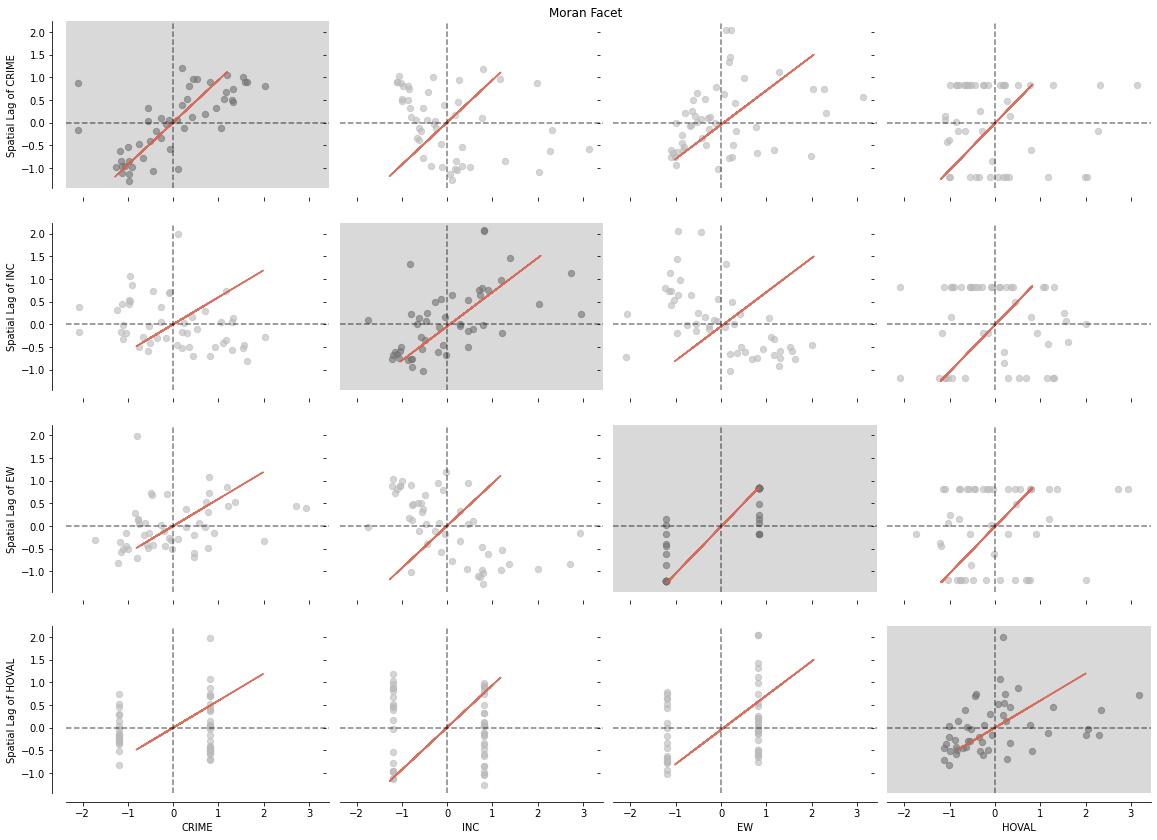

In [13]:
from splot.esda import moran_facet

moran_facet(matrix2)
plt.show()